#Bird Classification 
By- Parth Sagar
210431117



### Readme.md
Steps to replicate:
1. it is recommended to download the data in the google drive and save it with name  birds.zip
2. the notebook should be run in google colab environment with gpu for the best results.
3. if you have to run the model in any other environment the path needs to be changed in whole file.
4. if you want to test the file after run all just change the h5 path to use model from runtime.
5. else the h5 file of the model has been provided just upload it to google drive and run the commands provided below.


Importing the data

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#unzipping the dataset
! unzip /content/drive/MyDrive/birds.zip -d birds

Streaming output truncated to the last 5000 lines.
  inflating: birds/train/TEAL DUCK/112.jpg  
  inflating: birds/train/TEAL DUCK/113.jpg  
  inflating: birds/train/TEAL DUCK/114.jpg  
  inflating: birds/train/TEAL DUCK/115.jpg  
  inflating: birds/train/TEAL DUCK/116.jpg  
  inflating: birds/train/TEAL DUCK/117.jpg  
  inflating: birds/train/TEAL DUCK/118.jpg  
  inflating: birds/train/TEAL DUCK/119.jpg  
  inflating: birds/train/TEAL DUCK/120.jpg  
  inflating: birds/train/TEAL DUCK/121.jpg  
  inflating: birds/train/TEAL DUCK/122.jpg  
  inflating: birds/train/TEAL DUCK/123.jpg  
  inflating: birds/train/TEAL DUCK/124.jpg  
  inflating: birds/train/TEAL DUCK/125.jpg  
  inflating: birds/train/TEAL DUCK/126.jpg  
  inflating: birds/train/TEAL DUCK/127.jpg  
  inflating: birds/train/TEAL DUCK/128.jpg  
  inflating: birds/train/TEAL DUCK/129.jpg  
  inflating: birds/train/TEAL DUCK/130.jpg  
  inflating: birds/train/TEAL DUCK/131.jpg  
  inflating: birds/train/TEAL DUCK/132.jpg  
  in

In [ ]:
#loading the libraries
#for the usage of array:
import numpy as np 
#for impementing dataset and operations:
#import pandasql as ps
import pandas as pd
#for traversing in the dataset:
import os
#to convert data in pickle files for reproducibility:
import pickle
#for applying computer vision on images:
import cv2
#to apply models
import tensorflow as tf
#to plot the charts
import matplotlib.pyplot as plt
#for applying machine models and layers
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for finding the different predicting scores
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# for reinitialisation/allocation of the same images and batches
tf.random.set_seed(42)

Data Preprocessing

In [ ]:
# Image augmentation and Train test split
#rescaling the image
train_datagen = ImageDataGenerator(rescale=1./255,
                                    ) 

train_generator1 = train_datagen.flow_from_directory(
    '/content/birds/train', #training path
    target_size=(64,64), #size of the image
    batch_size=128, #batch size of the images
    ) # set as training data

validation_generator1 = train_datagen.flow_from_directory(
    '/content/birds/valid',  # validation directory 
    target_size=(64,64), #size of the image
    batch_size=128, #batch size of the images
    ) # set as validation data

test_generator1 = train_datagen.flow_from_directory(
    '/content/birds/test',  # test directory 
    target_size=(64,64), #size of the image
    batch_size=128, #batch size of the images
    shuffle=False
    ) # set as test data

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


In [ ]:
# Image augmentation and Train test split
#rescaling the image
train_datagen = ImageDataGenerator(rescale=1./255,
                                    ) 

train_generator = train_datagen.flow_from_directory(
    '/content/birds/train', #training path
    target_size=(128,128), #size of the image
    batch_size=200, #batch size of the images
    ) # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/birds/valid',  # validation directory 
    target_size=(128,128), #size of the image
    batch_size=200, #batch size of the images
    ) # set as validation data

test_generator = train_datagen.flow_from_directory(
    '/content/birds/test',  # test directory 
    target_size=(128,128), #size of the image
    batch_size=200, #batch size of the images
    shuffle=False
    ) # set as test data

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


Implementing VGG-16

In [ ]:
# calling the pretrained model vgg 16 and not including it's top layer
ImplementingVGG16=tf.keras.applications.VGG16(input_shape=(64,64,3),
                                               include_top=False,
                                               weights='imagenet')
# alloting the output value to a model
mod1=ImplementingVGG16.output
# making fullyconnected layer by flattening all the nodes in 1-d
mod1=tf.keras.layers.Flatten()(mod1)
# allotting the hidden layer
mod1=tf.keras.layers.Dense(units=256, activation=tf.nn.relu)(mod1)
# output layer of 250 categories
output1=tf.keras.layers.Dense(units=250, activation=tf.nn.softmax)(mod1)
# passing the values of  input and output layers
model1= tf.keras.models.Model(inputs=ImplementingVGG16.inputs,outputs=output1)

#compiling the model
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits= False),
             metrics=['accuracy'])

# summarising the model
model1.summary()

# fitting the model
hist1=model1.fit(train_generator1,epochs=10,validation_data=(validation_generator1), verbose=1)
print("Model Training Complete...")

Implementing Resnet(64*64)

In [ ]:
# calling the pretrained model resnet 50 and not including it's top layer
ImplementingResNet=tf.keras.applications.resnet.ResNet50(include_top= False, 
                                                         weights='imagenet',
                                                         input_shape= (64,64,3))
# summarising the model
ImplementingResNet.summary()
#adding the output of the pretrained model
mod=ImplementingResNet.output
# flattening the output for fullly connected layer to next hidden layer
mod=tf.keras.layers.Flatten()(mod)
# hidden layer 1
mod=tf.keras.layers.Dense(units=32, activation=tf.nn.relu)(mod)
# hidden layer 2
mod=tf.keras.layers.Dense(units=64, activation=tf.nn.relu)(mod)
# creating output layer
output=tf.keras.layers.Dense(units=250, activation=tf.nn.softmax)(mod)
# passing the input and output variables
model8= tf.keras.models.Model(inputs=ImplementingResNet.inputs,outputs=output)
# compiling the model
model8.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits= False),
             metrics=['accuracy'])
# summarising the model
model8.summary()
# fitting the model
hist8=model8.fit(train_generator1,epochs=20,validation_data=(validation_generator1), verbose=1)
print("Model Training Complete...")

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

Implementing Inception Net

In [ ]:
# calling the pretrained model Inception and not including it's top layer
ImplementingInception=tf.keras.applications.MobileNetV2(input_shape=(64,64,3),
                                               include_top=False,
                                               weights='imagenet')
#taking the values of the output of  second last layer of inception net
mod2=ImplementingInception.output
#flattening the nodes to make a fully connected layer
mod2=tf.keras.layers.Flatten()(mod2)
# adding a hidden layer
mod2=tf.keras.layers.Dense(units=32, activation=tf.nn.relu)(mod2)
# predicting the output from the class which has the maximum probability
output2=tf.keras.layers.Dense(units=250, activation=tf.nn.softmax)(mod2)
# 
model2= tf.keras.models.Model(inputs=ImplementingInception.inputs,outputs=output2)
# compiling the model, 
# learning rate has been dropped as the model was missing the local minima
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits= False),
             metrics=['accuracy'])
# summarising the model
model2.summary()
# fitting the model
hist2=model2.fit(train_generator1,epochs=20,validation_data=(validation_generator1), verbose=1)
print("Model Training Complete...")

# Main model

Implementing RESNET

In [ ]:
Model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath="Resnet.h5", verbose=2, save_best_only=True)
#call back to sAve the best model

Callback=[Model_checkpoint]


In [ ]:
# calling the pretrained model resnet 50 and not including it's top layer
ImplementingResNet=tf.keras.applications.resnet.ResNet50(include_top= False, 
                                                         weights='imagenet',
                                                         input_shape= (128,128,3))
#summarising the model
ImplementingResNet.summary()
# extracting the output
mod=ImplementingResNet.output
# flattening the layer
mod=tf.keras.layers.Flatten()(mod) 
#applying hidden layer with 2048 nodes to extract minute features
mod=tf.keras.layers.Dense(units=2048, activation=tf.nn.relu)(mod)
#output layer with 250 classes
output=tf.keras.layers.Dense(units=250, activation=tf.nn.softmax)(mod)
# passing ethe input and output
model8= tf.keras.models.Model(inputs=ImplementingResNet.inputs,outputs=output)
# compiling the model
model8.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits= False),
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy' ])
#summarising the model
model8.summary()
#fitting the model
hist8=model8.fit(train_generator,epochs=20,validation_data=(validation_generator),callbacks=Callback, verbose=1)
print("Model Training Complete...")

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

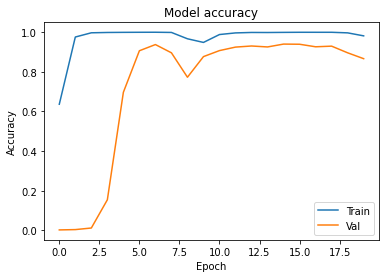

In [ ]:
#plotting accuracy graph
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

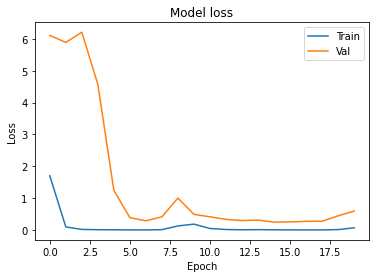

In [ ]:
#plotting loss graph
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from keras.models import load_model
#testing the model
test_model = load_model('/content/drive/MyDrive/resnet50.h5')
test_model.evaluate(test_generator)

7/7 [==============================] - 3s 258ms/step - loss: 0.1978 - accuracy: 0.9560


[0.1977793276309967, 0.9559999704360962]

In [ ]:
! pip install seaborn

In [ ]:
import seaborn as sns

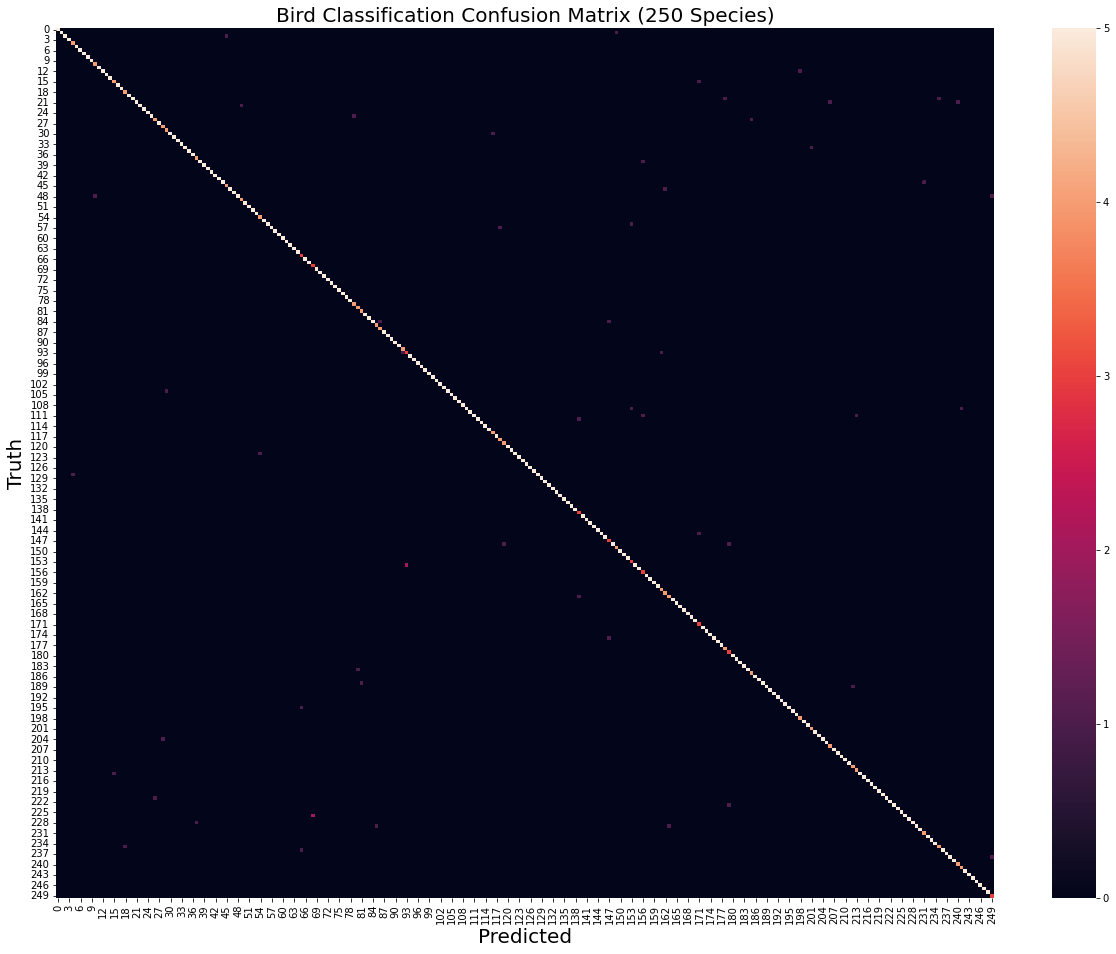

In [ ]:
predicted_classes = np.argmax(test_model.predict(test_generator), axis=-1)
gt_classes = test_generator.classes

#creating confusion matrix from ground truth and predicted values for 'Survived'
cmbird = confusion_matrix(predicted_classes, gt_classes)

#Formatting confusion matrix into heatmap.
plt.figure(figsize = (21,16))
sns.heatmap(cmbird, fmt='')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Truth', fontsize=20)
plt.title('Bird Classification Confusion Matrix (250 Species)', fontsize=20);

In [ ]:
#predicting the classes
classes = test_generator.class_indices
dic = {i:u for u,i in classes.items()}

In [ ]:
#printing the dictionary
dic

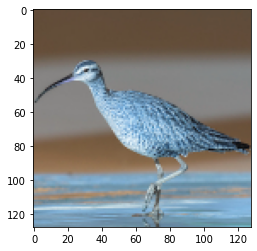

Predicted class: WHIMBREL


In [ ]:
#testing if the model is really predicting the class form random image from google
img = cv2.imread("/content/bird.jpg")
img = cv2.resize(img, (128,128))
plt.imshow(img)
plt.show()
pred = test_model.predict(1/255*(np.array([img])))
pred = np.argmax(pred)
print('Predicted class:', dic[pred])